In [11]:
import sys
sys.path.append('CONFIG_files/')

import CONFIG as C
from main import main

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# import numpy as np
# import pandas as pd
# import shutil

# from utils import multirun
# from preprocessing_utils import DataPreprocessing

# matplotlib.rc_file_defaults()
# %matplotlib inline

# # import CONFIG_SUSHIWAT_BGMM_23_JUNE_2023 as C
# # import CONFIG_COMBINED_MLP_04MARCH2024_EXP_2 as C
# import CONFIG as C

# pd.options.display.max_columns = None

# np.random.seed(4)

# %load_ext autoreload
# %autoreload 2

# device = C.device

# C.REGION, C.RUN_NAME, C.split_by

,run,epoch,loss,valid_loss,test_loss,decision_loss,epoch duration,run duration,lr,batch_size,likelihood_fn,dropout_rate,random_noise,k,model_arch,predictors
0,1,1,1.372125,1.240992,1.362851,1.240992,16.831254,16.831268,0.0001,32,bgmm,0,0,0,"(MLP, [50, 50])","(core, [precip_norris, rain_norris, doy_sin, d..."
1,1,2,1.320697,1.244180,1.364325,1.244180,16.955585,33.807513,0.0001,32,bgmm,0,0,0,"(MLP, [50, 50])","(core, [precip_norris, rain_norris, doy_sin, d..."
2,1,3,1.318603,1.242053,1.364035,1.242053,16.797655,50.618194,0.0001,32,bgmm,0,0,0,"(MLP, [50, 50])","(core, [precip_norris, rain_norris, doy_sin, d..."
3,1,4,1.317158,1.243043,1.368118,1.243043,16.869416,67.513557,0.0001,32,bgmm,0,0,0,"(MLP, [50, 50])","(core, [precip_norris, rain_norris, doy_sin, d..."
4,1,5,1.316094,1.242758,1.365951,1.242758,16.856312,84.387992,0.0001,32,bgmm,0,0,0,"(MLP, [50, 50])","(core, [precip_norris, rain_norris, doy_sin, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100,1,1.277996,1.097367,1.174211,1.097367,18.114659,18.114769,0.0001,32,bgmm,0,0,9,"(MLP, [50, 50])","(all_year, [precip_norris, rain_norris, doy_si..."
496,100,2,1.189801,1.090550,1.176058,1.090550,18.226427,36.367905,0.0001,32,bgmm,0,0,9,"(MLP, [50, 50])","(all_year, [precip_norris, rain_norris, doy_si..."
497,100,3,1.181910,1.085026,1.169072,1.085026,17.800196,54.199703,0.0001,32,bgmm,0,0,9,"(MLP, [50, 50])","(all_year, [precip_norris, rain_norris, doy_si..."
498,100,4,1.177210,1.082972,1.172789,1.082972,18.071087,72.309406,0.0001,32,bgmm,0,0,9,"(MLP, [50, 50])","(all_year, [precip_norris, rain_norris, doy_si..."


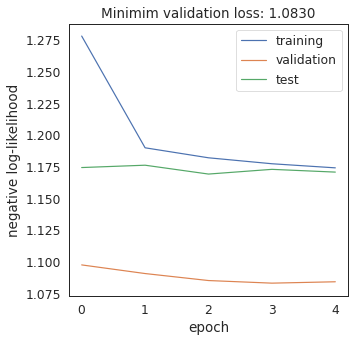

MLP_[50, 50]_bgmm_B=32_Pred=all_year_K=9
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/data/hpcdata/users/marron31/conda-envs/bcdp/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_40045/2081381739.py", line 1, in <cell line: 1>
    main(C)
  File "/users/marron31/repos/upper-indus-prec-bc/main.py", line 23, in main
    st_test, predictions, importances = multirun(C, C.predictors, C.params, C.epochs,
  File "/users/marron31/repos/upper-indus-prec-bc/utils.py", line 1388, in multirun
    predictions[run][f'k{i}']['k_fold'] = i
KeyError: 'k1'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data/hpcdata/users/marron31/conda-envs/bcdp/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/data/hpcdata/users/marron31/conda-envs/bcdp/lib/python3.9/site-packages/IP

In [13]:
main(C)

### Import data

In [12]:
data = DataPreprocessing(train_path=C.TRAIN_PATH, start=C.start, end=C.end, 
                add_yesterday = False, 
                basin_filter = None, 
                split_bias_corrected_only = False, 
                filter_incomplete_years = False, 
                include_non_bc_stations = True, 
                split_by = C.split_by)

### Split data into held out sets for K-fold cross validation

In [13]:
if C.SORT_BY_ELEVATION:
    data.split_stations(sort_by_elev = True)
else:
    data.split_stations(sort_by_elev = False)
    
print(C.SORT_BY_ELEVATION)

False


### Prepare data

In [14]:
if C.ADD_PREVIOUS_DAY:
    C.predictors.append('obs_yesterday')

data.input_data(C.predictors, C.predictand, sort_by_quantile=C.sort_by_quantile)

print(C.ADD_PREVIOUS_DAY)
print(C.sort_by_quantile)

AttributeError: module 'CONFIG' has no attribute 'predictors'

## Multi-Run: Train model with different hyperparameters

### Model run

In [27]:
experiment_label = C.RUN_NAME
experiment_label, C.K_FOLD

('COMBINED_LIKELIHOODS_7MARCH2024_2', 10)

In [29]:
load_run = None

,run,epoch,loss,valid_loss,test_loss,decision_loss,epoch duration,run duration,lr,batch_size,likelihood_fn,dropout_rate,random_noise,k,model_arch
0,1,1,2.224166,1.699784,1.665825,1.699784,6.860500,6.860507,0.00001,128,bgmm,0,0,0,"(MLP, [50, 50])"
1,1,2,1.453310,1.320510,1.398757,1.320510,7.080497,13.956548,0.00001,128,bgmm,0,0,0,"(MLP, [50, 50])"
2,1,3,1.301333,1.195197,1.309355,1.195197,7.079454,21.051078,0.00001,128,bgmm,0,0,0,"(MLP, [50, 50])"
3,1,4,1.247507,1.157513,1.279662,1.157513,7.277922,28.343992,0.00001,128,bgmm,0,0,0,"(MLP, [50, 50])"
4,1,5,1.230176,1.143288,1.268140,1.143288,7.152981,35.510659,0.00001,128,bgmm,0,0,0,"(MLP, [50, 50])"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20,6,0.862483,0.715790,0.808555,0.715790,6.884919,42.588969,0.00001,128,bernoulli_lognormal,0,0,9,"(MLP, [50, 50])"
196,20,7,0.856082,0.712180,0.803688,0.712180,6.805428,49.417642,0.00001,128,bernoulli_lognormal,0,0,9,"(MLP, [50, 50])"
197,20,8,0.851214,0.708906,0.801275,0.708906,7.772654,57.218854,0.00001,128,bernoulli_lognormal,0,0,9,"(MLP, [50, 50])"
198,20,9,0.847505,0.706987,0.798747,0.706987,7.195248,64.435032,0.00001,128,bernoulli_lognormal,0,0,9,"(MLP, [50, 50])"


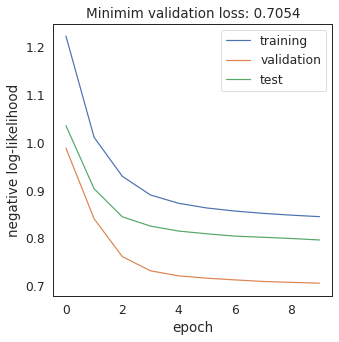

MLP_[50, 50]_bernoulli_lognormal_B=128_D=0_RN=0


/users/marron31/repos/upper-indus-prec-bc/utils.py:1351: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions[run]['k_all'] = predictions[run]['k_all'].append(predictions[run][f'k{i}'])
/users/marron31/repos/upper-indus-prec-bc/utils.py:1351: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions[run]['k_all'] = predictions[run]['k_all'].append(predictions[run][f'k{i}'])
/users/marron31/repos/upper-indus-prec-bc/utils.py:1351: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions[run]['k_all'] = predictions[run]['k_all'].append(predictions[run][f'k{i}'])
/users/marron31/repos/upper-indus-prec-bc/utils.py:1351: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [31]:
if load_run == None:
    src = 'CONFIG.py'
    dst = f'CONFIG_files/CONFIG_{experiment_label}.py'
    shutil.copy(src, dst)

st_test, predictions, importances = multirun(data, C.predictors, C.params, C.epochs, 
                                split_by = 'station', 
                                draw_samples=False, sequential_samples = True, n_samples=1, 
                                load_run = load_run,
                                experiment_label = experiment_label, 
                                feature_attribution = False, 
                                show_loss_plot=True,
                                use_device='cpu')

In [9]:
# table_of_predictions_ks_test(predictions, C.seasons, columns, sample_cols, add_cols)

In [10]:
# table_of_predictions_for_metric(predictions, C.seasons, columns, C.n_samples, sample_cols, add_cols, metric = 'smape', prefix='smape')

In [11]:
# table_of_predictions_for_metric(predictions, C.seasons, columns, C.n_samples, sample_cols, add_cols, metric = 'edd', prefix='edd')

In [12]:
# table_of_predictions_for_metric(predictions, C.seasons, columns, C.n_samples, sample_cols, add_cols, metric = 'ae', prefix='ae')

In [9]:
a = pd.read_csv('results.csv')

b = a.groupby(['k','run']).agg({'valid_loss': 'min', 
                                 'model_arch': 'first', 
                                 'likelihood_fn': 'first',
                                 'lr':'first',
                                 'batch_size':'first',
                                 'dropout_rate':'first',
                               })

c = b.groupby(['run']).agg({'valid_loss': 'mean', 
                        'model_arch': 'first', 
                        'likelihood_fn': 'first',
                        'lr':'first',
                        'batch_size':'first',
                        'dropout_rate':'first',
                         }
                   ).sort_values('valid_loss').reset_index()

c.groupby(['model_arch',
           'likelihood_fn',
           'lr',
           'batch_size',
           'dropout_rate',
           ]).agg({'valid_loss': 'mean'}
                   ).sort_values('valid_loss').reset_index()

,model_arch,likelihood_fn,lr,batch_size,dropout_rate,valid_loss
0,"('MLP', [50, 50])",bernoulli_lognormal,0.001,32,0,0.963873
1,"('MLP', [50, 50])",bgmm,0.001,32,0,1.308123
2,"('MLP', [50, 50])",gumbel,0.001,32,0,1.315626
3,"('MLP', [50, 50])",halfnormal,0.001,32,0,2.648686
4,"('MLP', [50, 50])",gaussian,0.001,32,0,3.901173
